In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
from scipy.optimize import basinhopping
import matplotlib.pyplot as plt
import time

In [2]:
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def Total_Energy(positions):

    E = 0
    N_atom = int(len(positions)/3)

    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E

            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

N_attempts = 50
f_values = []
x_values = []


In [3]:
indexarrays = [['Nelder-Mead','Nelder-Mead',
                'CG','CG',
                'BFGS','BFGS'],
               ['ground state','computation time',
                'ground state','computation time',
                'ground state','computation time',]]
df = pd.DataFrame(columns = range(3,21), index = indexarrays )

In [4]:
methodlist = ['Nelder-Mead','CG','BFGS']
for i in range(3,15):
    for method in methodlist:
        f_values.clear()
        t1 = time.time()
        N_atom = i
        print(N_atom, method)
        pos = init_pos(N_atom)
        minimizer_kwargs = {"method":method}
        result =  basinhopping(Total_Energy, pos, minimizer_kwargs= minimizer_kwargs , niter=200)
        df.loc[(method,'ground state'),i] = result.fun 
        t2 = time.time()
        df.loc[(method,'computation time'),i] = t2 - t1

3 Nelder-Mead
3 CG
3 BFGS
4 Nelder-Mead
4 CG
4 BFGS
5 Nelder-Mead
5 CG
5 BFGS
6 Nelder-Mead
6 CG
6 BFGS
7 Nelder-Mead
7 CG
7 BFGS
8 Nelder-Mead
8 CG
8 BFGS
9 Nelder-Mead
9 CG
9 BFGS
10 Nelder-Mead
10 CG
10 BFGS
11 Nelder-Mead
11 CG
11 BFGS
12 Nelder-Mead
12 CG
12 BFGS
13 Nelder-Mead
13 CG
13 BFGS
14 Nelder-Mead
14 CG
14 BFGS


In [5]:
df


3        4        5        6        7   \
Nelder-Mead ground state           -3       -6 -6.00005 -9.10387 -12.7121   
            computation time  6.00934  29.2228  52.9442  99.8177  180.031   
CG          ground state           -3       -6 -9.10385 -12.7121 -16.5054   
            computation time  3.99319  13.7242   33.601  82.1992  165.938   
BFGS        ground state           -3       -6 -9.10385 -12.3029 -16.5054   
            computation time  4.42898  17.5488  39.8162  60.7089  136.181   

                                   8        9        10       11       12  \
Nelder-Mead ground state      -18.809 -23.8432 -27.8539 -31.6307 -37.0307   
            computation time  267.773  377.181  505.761  671.169  865.492   
CG          ground state     -19.8215 -24.1134 -28.4225 -16.5054 -37.9676   
            computation time  322.357  578.283  665.741  575.557  2314.68   
BFGS        ground state     -19.8215 -24.1134 -28.4225  -32.766 -37.9676   
            computation time  237.513  371.181  484.569  707.777  1162.77   

                                   13       14   15   16   17   18   19   20  
Nelder-Mead ground state     -40.1518 -45.7099  NaN  NaN  NaN  NaN  NaN  NaN  
            computation time  1095.71  1356.74  NaN  NaN  NaN  NaN  NaN  NaN  
CG          ground state     -44.3268 -47.8452  NaN  NaN  NaN  NaN  NaN  NaN  
            computation time  3295.84  4227.96  NaN  NaN  NaN  NaN  NaN  NaN  
BFGS        ground state     -44.3268 -47.8452  NaN  NaN  NaN  NaN  NaN  NaN  
            computation time  1408.04  1783.95  NaN  NaN  NaN  NaN  NaN  NaN

3     3.99319
4     13.7242
5      33.601
6     82.1992
7     165.938
8     322.357
9     578.283
10    665.741
11    575.557
12    2314.68
13    3295.84
14    4227.96
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
Name: (CG, computation time), dtype: object


Text(0.5,1,'#of atoms v. energy')

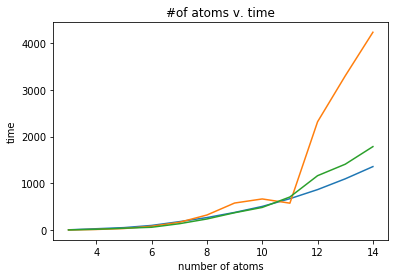

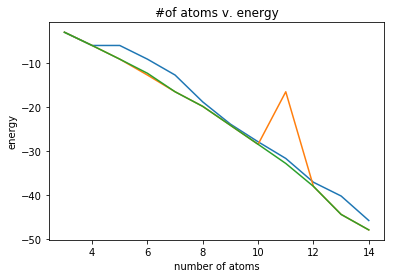

In [6]:
plt.figure()
print(df.loc['CG','computation time'])
plt.plot(df.loc['Nelder-Mead','computation time'])
plt.plot(df.loc['CG','computation time'])
plt.plot(df.loc['BFGS','computation time'])
plt.ylabel('time')
plt.xlabel('number of atoms')
plt.title('#of atoms v. time')
plt.figure(2)
plt.plot(df.loc['Nelder-Mead','ground state'])
plt.plot(df.loc['CG','ground state'])
plt.plot(df.loc['BFGS','ground state'])
plt.ylabel('energy')
plt.xlabel('number of atoms')
plt.title('#of atoms v. energy')